Q-Learning with Neural Networks
Table-based Q-learning cannot scale. So need way to take description of state and produce Q-values for actions without using tables.

We can use neural network as function approximator. Taking a any number of possible states and represent them as a vector that we can learn to map to Q-values

Frozen Lake problem
Encode state in a one-hot vector (1x16)
Produce a vector of 4 Q-values one for each action. This will act like a table, with network weights serving as cells. 
Easier to expand a Tensorflow network though. To update the network we use backpropagation and loss function (like sum-of-square loss where the difference between the current predicted Q-values, and the 'target' value is computed and the gradients passed throughh the network.). 

Q-target for chosen action is equivalent to the Q-value computed by the following equation.
Loss = ∑(Q-target - Q)²


In [1]:
import gym
import numpy as np
import random 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# Load environment
env = gym.make('FrozenLake-v0')

[2017-06-08 09:17:28,513] Making new env: FrozenLake-v0


### Q-Network
#### Implementation

In [3]:
tf.reset_default_graph()

In [4]:
inputs1 = tf.placeholder(shape=[1,16], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16, 4], 0,0.01))
Qout = tf.matmul(inputs1, W)
predict = tf.argmax(Qout, 1)

#Get the loss by taking sum of squares difference between the target and prediction Q values
nextQ = tf.placeholder(shape=[1, 4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
updateModel = trainer.minimize(loss)

### Training


In [5]:
# init = tf.initialize_all_variables()

# # Set learning parameters
# y = .99
# e = 0.1
# num_episodes = 2000
# #create lists to contain total rewards and steps per episode
# jList = []
# rList = []
# with tf.Session() as sess:
#     sess.run(init)
#     for i in range(num_episodes):
#         #Reset environment and get first new observation
#         s = env.reset()
#         rAll = 0
#         d = False
#         j = 0
#         #The Q-Network
#         while j < 99:
#             j+=1
#             #Choose an action by greedily (with e chance of random action) from the Q-network
#             a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
#             if np.random.rand(1) < e:
#                 a[0] = env.action_space.sample()
#             #Get new state and reward from environment
#             s1,r,d,_ = env.step(a[0])
#             #Obtain the Q' values by feeding the new state through our network
#             Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
#             #Obtain maxQ' and set our target value for chosen action.
#             maxQ1 = np.max(Q1)
#             targetQ = allQ
#             targetQ[0,a[0]] = r + y*maxQ1
#             #Train our network using target and predicted Q values
#             _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
#             rAll += r
#             s = s1
#             if d == True:
#                 #Reduce chance of random action as we train the model.
#                 e = 1./((i/50) + 10)
#                 break
#         jList.append(j)
#         rList.append(rAll)
# print('Percent of successful episodes: ', str(sum(rList)/num_episodes))

In [6]:
init = tf.initialize_all_variables()

# learning params
y = 0.99
e = 0.1
num_episodes = 2000

# list of total rewards and steps per episode
jList = []
rList = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        # reset environment and get first observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0

        # the Q-Network
        while j < 99:
            j+=1
            # Greedily choose an action with e chance of random action from the network
            a, allQ = sess.run([predict,Qout], feed_dict={inputs1: np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            # get new state and reward from environment
            s1, r, d, _ = env.step(a[0])
            Q1 = sess.run(Qout, feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            # obtain the MaxQ and reset out target value for chosen action
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0, a[0]] = r + y * maxQ1
            # Train the network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1], nextQ:targetQ})
            rAll += r
            s = s1

            if d == True:
                # reduce chance of random action as we train the model.
                e = 1./((i/50)+10)
                break
        jList.append(j)
        rList.append(rAll)
    
print('Percent of successful episodes: ', str(sum(rList)/num_episodes))
#print "Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%"
        


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-06-08 09:17:28,696] From <ipython-input-6-2c7ec424f393>:1: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Percent of successful episodes:  0.0645


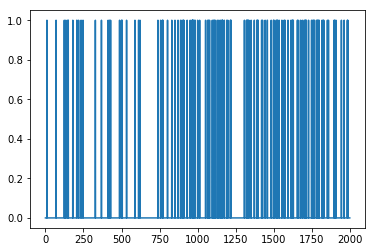

In [7]:
# Show some stats
plt.plot(rList)

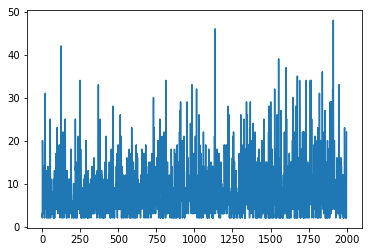

In [8]:
# network begins to progress through the environment for longer than chance around 750 mark
plt.plot(jList)